# 3.2  Exercise

Amelia Farrell

DSC520

12/13/21


# Exercise 1-1  -- Open chap01ex.ipynb and ececute the all the cells. 

In [2]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [3]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,datecon_i,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1093.0,NaN,1084.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1093.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1166.0,NaN,1157.0,NaN,NaN,9.0,0.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1166.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,NaN,1.0,1156.0,NaN,1147.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,9.0,2.0,NaN,2.0,2.0,0.0,NaN,1.0,1.0,4.0,NaN,1156.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1198.0,NaN,1189.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1204.0,NaN,1195.0,NaN,NaN,0.0,39.0,39.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [4]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [5]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [6]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [7]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [8]:
pregordr[0]

1

Select a slice from a column.

In [9]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [10]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [11]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [12]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [13]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [14]:
import nsfg
preg = nsfg.ReadFemPreg()
preg.birthord.value_counts().sort_index()


1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [15]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [ ]:
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [16]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [17]:
preg['totalwgt_kg'] = preg.totalwgt_lb*0.453592
preg.totalwgt_kg.mean()

3.2956309433503437

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [18]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [ ]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [ ]:
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [19]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,marstat,fmarstat,fmarit,evrmarry,hisp,hispgrp,numrace,roscnt,hplocale,manrel,fl_rage,fl_rrace,fl_rhisp,goschol,vaca,higrade,compgrd,havedip,dipged,cmhsgrad,havedeg,degrees,wthparnw,onown,intact,parmarr,lvsit14f,lvsit14m,womrasdu,momdegre,...,fibroids,pidtreat,evhivtst,anyprghp_i,anymschp_i,infever_i,ovulate_i,tubes_i,infertr_i,inferth_i,advice_i,insem_i,invitro_i,endomet_i,fibroids_i,pidtreat_i,evhivtst_i,insuranc,metro,religion,laborfor,insuranc_i,metro_i,religion_i,laborfor_i,poverty,totincr,pubassis,poverty_i,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,2,6.0,5,0,1,1.0,1,5,1.0,2.0,0,0,0,5,NaN,10,1.0,5.0,NaN,NaN,NaN,NaN,2,5.0,1.0,1,NaN,NaN,NaN,1.0,...,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,7,0,0,0,0,156,9,2,0,0,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [19]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,cmotpreg,prgoutcome,cmprgend,flgdkmo1,cmprgbeg,ageatend,hpageend,gestasun_m,gestasun_w,wksgest,mosgest,dk1gest,dk2gest,dk3gest,bpa_bdscheck1,bpa_bdscheck2,bpa_bdscheck3,babysex,birthwgt_lb,birthwgt_oz,lobthwgt,babysex2,birthwgt_lb2,birthwgt_oz2,lobthwgt2,babysex3,birthwgt_lb3,birthwgt_oz3,lobthwgt3,cmbabdob,...,agecon_i,fmarout5_i,pmarpreg_i,rmarout6_i,fmarcon5_i,learnprg_i,pncarewk_i,paydeliv_i,lbw1_i,bfeedwks_i,maternlv_i,oldwantr_i,oldwantp_i,wantresp_i,wantpart_i,ager_i,fmarital_i,rmarital_i,educat_i,hieduc_i,race_i,hispanic_i,hisprace_i,rcurpreg_i,pregnum_i,parity_i,insuranc_i,pubassis_i,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1119.0,NaN,1110.0,NaN,NaN,0.0,40.0,40.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1142.0,NaN,1134.0,NaN,NaN,0.0,36.0,36.0,8.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1142.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494756
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1159.0,NaN,1152.0,NaN,NaN,0.0,30.0,30.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1159.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899417
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,1.0,1198.0,NaN,1189.0,NaN,NaN,0.0,40.0,40.0,9.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118445


How old is the respondent with `caseid` 1?

In [20]:
resp[resp.caseid == 1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [ ]:
preg[preg.caseid == 2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [ ]:
preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

# Exercise 1.2 -- Create a file name that reads the respondent file ......

In [20]:
##   Copy and paste all the functions defined in the file nsfg.py
from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.iteritems():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def main():
    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()

    assert(len(resp) == 7643)
    assert(resp.pregnum.value_counts()[1] == 1267)

    # read and validate the pregnancy file
    preg = ReadFemPreg()
    print(preg.shape)

    assert len(preg) == 13593
    assert preg.caseid[13592] == 12571
    assert preg.pregordr.value_counts()[1] == 5033
    assert preg.nbrnaliv.value_counts()[1] == 8981
    assert preg.babysex.value_counts()[1] == 4641
    assert preg.birthwgt_lb.value_counts()[7] == 3049
    assert preg.birthwgt_oz.value_counts()[0] == 1037
    assert preg.prglngth.value_counts()[39] == 4744
    assert preg.outcome.value_counts()[1] == 9148
    assert preg.birthord.value_counts()[1] == 4413
    assert preg.agepreg.value_counts()[22.75] == 100
    assert preg.totalwgt_lb.value_counts()[7.5] == 302

    weights = preg.finalwgt.value_counts()
    key = max(weights.keys())
    assert preg.finalwgt.value_counts()[key] == 6

    # validate that the pregnum column in `resp` matches the number
    # of entries in `preg`
    assert(ValidatePregnum(resp, preg))

    
    print('All tests passed.')


if __name__ == '__main__':
    main()


(13593, 244)
All tests passed.


In [17]:
preg = nsfg.ReadFemPreg() # Read the respondent file and assign a name 'preg'. 


In [21]:
preg.pregnum # Take a look at pregnum variable

0        2
1        2
2        3
3        3
4        3
        ..
13588    5
13589    5
13590    5
13591    5
13592    5
Name: pregnum, Length: 13593, dtype: int64

In [22]:
preg.pregnum.value_counts().sort_index() # Check the value counts for the variable pregnum  

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

In [18]:
resp = nsfg.ReadFemResp()
ValidatePregnum(resp, preg)

True

In [23]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

# Exercise 2.1


- I recommend you to read page 24 of  your text book and decide which summary statistics you would like to choose. 

- Based on the results in this chapter, suppose you were asked to summarize what you learned about whether first babies arrive late?


Summary Statistics of Pregnancy Length and Birth Order

In [28]:
from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2
def Mode(hist):
    """Returns the value with the highest frequency.
    hist: Hist object
    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x


def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.
    hist: Hist object
    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


def DifferenceinWeeks(live, firsts, others):
    """Explore the difference in weight between first babies and others.
    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.wksgest.mean()
    mean1 = firsts.wksgest.mean()
    mean2 = others.wksgest.mean()

    var1 = firsts.wksgest.var()
    var2 = others.wksgest.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in Weeks', mean1 - mean2)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.wksgest, others.wksgest)
    print('Cohen d', d)


def main(script):
    """Tests the functions in this module.
    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.wksgest)

    # explore the week difference between first babies and others
    DifferenceinWeeks(live, firsts, others)

if __name__ == '__main__':
    main(sys.argv)

Mean
First babies 38.66886663632226
Others 38.540580631489725
Variance
First babies 8.414113579751607
Others 7.558706826848386
Difference in Weeks 0.12828600483253183
Difference relative to mean (%age points) 0.33232618937724934
Cohen d 0.045437370612436793


Histogram of Pregnancy in Weeks By Birth Order

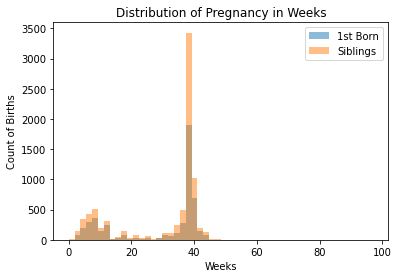

In [29]:
import numpy
from matplotlib import pyplot

# Data frame of only first borns
newdf = preg[preg.pregordr==1]
# Data frame of first borns siblings
newdf2 = preg[preg.pregordr>1]

# Histogram
x = newdf.wksgest
y = newdf2.wksgest

# Using 52 bins for the 52 weeks in the year
pyplot.hist(x, bins=52, alpha=0.5, label='1st Born')
pyplot.hist(y, bins=52, alpha=0.5, label='Siblings')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Pregnancy in Weeks")
pyplot.xlabel("Weeks")
pyplot.ylabel("Count of Births")
pyplot.show()

Exercise 2.1 Interpretation of results
- Based on above results, difference in mean between first and babies born after (siblings) is 0.128, indicating that first babies born later than their proceeding siblings. 
- Cohen's d difference between groups is 0.0454. Anything between 0.2 and 0.3 is considered a low effect. So our Cohen's d of 0.0454 is not significant enough to make any inferences about weather or not first babies are born sooner than others.
- As we can see from the histogram, it is clear that the mode of both groups is around 39 weeks. The distribution is not completely symmetric, we can see the number of premature babies born between 0 and 20 weeks. It then drops down until we reach the mode of 36 weeks. It is also important to note the hard stop at 42 weeks where doctors typically intervene and induce birth. We don’t see many outliers here other than the premature babies (note that we did not exclude babies that past away after birth, this would surly change the look of the distribution).
- The above histogram shows us the two distributions, however, due to the difference in sample size between the two groups, it does not help us determine if first babies are born sooner than their siblings. We also can't base our conclusion solely off the difference in mean. Cohen's d only lets us know that there is a very small difference in mean, not weather or not it is significant. We would need to run an ANVOA test to determine its significance. Another way that we could try to visualize this would be using a PCF (which we will be reviewing next week).

# Exercise 2.4

- Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
- Make sure you include histograms as part of your analysis.

In [41]:
from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2
def Mode(hist):
    """Returns the value with the highest frequency.
    hist: Hist object
    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x


def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.
    hist: Hist object
    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)


def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.
    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)


def main(script):
    """Tests the functions in this module.
    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # explore the weight difference between first babies and others
    WeightDifference(live, firsts, others)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert(mode == 39)

    # test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)

    for value, freq in modes[:5]:
        print(value, freq)

    print('%s: All tests passed.' % script)


if __name__ == '__main__':
    main(sys.argv)

Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.0180273009157768
Others 1.9437810258964572
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) -1.7171423678372415
Cohen d -0.088672927072602
Mode of preg length 39
39 4693
40 1116
38 607
41 587
37 455
['/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-a5c74729-ffbb-4614-9c1b-e63dbde940cc.json']: All tests passed.


Histogram of Baby Weight By Birth Order

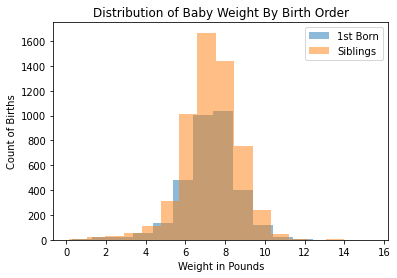

In [32]:
import numpy
from matplotlib import pyplot

# Data frame of only first borns
newdf = preg[preg.pregordr==1]
# Data frame of first borns siblings
newdf2 = preg[preg.pregordr>1]

# Histogram
x = newdf.totalwgt_lb
y = newdf2.totalwgt_lb

pyplot.hist(x, bins=15, alpha=0.5, label='1st Born')
pyplot.hist(y, bins=15, alpha=0.5, label='Siblings')
pyplot.legend(loc='upper right')
pyplot.title("Distribution of Baby Weight By Birth Order")
pyplot.xlabel("Weight in Pounds")
pyplot.ylabel("Count of Births")
pyplot.show()

Exercise 2.4 Interpretation of results
- Based on above results, difference in mean between first and their siblings is -0.1247, indicating that babies born first are lighter than others. 
- Cohen's d difference between groups is -0.0886.
- As we can see from the histogram, 1st born babies tend to have a slighly left skewed distribution, indicating that they are lighter more often than not.
- However, you can also see a similar distribution for the 2nd, 3rd, etc. born children. This is a great exzample of why simply visulizing the data, does not always give us the information we need. Cohen's d gives us the "proof" we needed in order to show that there is a relationship between brith order and weight.